In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

And the pytorch libraries we are going to use:

In [2]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from torch.utils.data import random_split
from torchvision.utils import make_grid
from PIL import Image

In [3]:
!ls

'1_Raio X sem identificação.zip'   Fibrosis    single_label_covid.ipynb
 Consolidation			   Mass       'teste covid 19.ipynb'
 DICOM				   models      Untitled.ipynb
 DICOMDIR			   Pneumonia
 Edema				   PNG


In [4]:
class my_Dataset(Dataset):
    def __init__(self, transform=None):
        covid_list = glob.glob('./PNG/*')
        covid_label = torch.ones(len(covid_list))
        
        pneumo_list = glob.glob('./Pneumonia/*')
        pneumo_label = torch.zeros(len(pneumo_list))
        
        mass_list = glob.glob('./Mass/*')
        mass_label = torch.zeros(len(mass_list))
        
        consolidation_list = glob.glob('./Consolidation/*')
        consolidation_label = torch.zeros(len(consolidation_list))

        edema_list = glob.glob('./Edema/*')
        edema_label = torch.zeros(len(edema_list))
        
        fibrosis_list = glob.glob('./Fibrosis/*')
        fibrosis_label = torch.zeros(len(fibrosis_list))   
        
        self.images = covid_list + pneumo_list + mass_list + consolidation_list + edema_list + fibrosis_list
        self.labels = torch.cat([covid_label, pneumo_label, mass_label, consolidation_label, edema_label, fibrosis_label])
        self.trfm = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        x = Image.open(self.images[index])
        if x.mode is not 'RGB':
            x = x.convert('RGB')
        if self.trfm is not None:
            x = self.trfm(x)
        else:
            x = transforms.ToTensor()(x)
        y = self.labels[index].long()
        return x, y

<>:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-4-651f90a8f329>:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if x.mode is not 'RGB':


In [5]:
class my_Dataset(Dataset):
    def __init__(self, transform=None):
        covid_list = glob.glob('./PNG/*')
        covid_label = torch.ones(len(covid_list))
        
        pneumo_list = glob.glob('./Pneumonia/*')
        pneumo_label = torch.zeros(len(covid_list))
        
        mass_list = glob.glob('./Mass/*')
        mass_label = torch.zeros(len(covid_list))
        
        consolidation_list = glob.glob('./Consolidation/*')
        consolidation_label = torch.zeros(len(covid_list))

        edema_list = glob.glob('./Edema/*')
        edema_label = torch.zeros(len(covid_list))
        
        fibrosis_list = glob.glob('./Fibrosis/*')
        fibrosis_label = torch.zeros(len(covid_list))   
        
        self.images = covid_list + pneumo_list[:len(covid_list)] + mass_list[:len(covid_list)] + consolidation_list[:len(covid_list)] + edema_list[:len(covid_list)] + fibrosis_list[:len(covid_list)]
        self.labels = torch.cat([covid_label, pneumo_label, mass_label, consolidation_label, edema_label, fibrosis_label])
        self.trfm = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, index):
        x = Image.open(self.images[index])
        if x.mode is not 'RGB':
            x = x.convert('RGB')
        if self.trfm is not None:
            x = self.trfm(x)
        else:
            x = transforms.ToTensor()(x)
        y = self.labels[index].long()
        return x, y

<>:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-5-9bc3f388f764>:30: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if x.mode is not 'RGB':


In [72]:
trans = transforms.Compose([
                            transforms.Resize((256,256)),
                            transforms.RandomRotation(30),
                            transforms.ColorJitter(brightness=0.4,contrast=0.4),
                            #transforms.RandomHorizontalFlip(p=0.1),
                            transforms.ToTensor()
])

In [7]:
data = my_Dataset(trans)

In [8]:
data[10][0].shape

torch.Size([3, 256, 256])

In [9]:
len_ds = len(data)
len_train = int(0.8*len_ds)
len_val = len_ds - len_train

In [10]:
len_ds

738

In [11]:
ds_train, ds_val = random_split(data, [len_train, len_val])

In [12]:
train_dl = DataLoader(dataset=ds_train, batch_size=32, shuffle=True, num_workers=6, pin_memory=True)
val_dl = DataLoader(dataset=ds_val, batch_size=32, shuffle=False, num_workers=6, pin_memory=True)

In [13]:
def show(img, y=None, color=True):
    npimg = img.numpy()
    npimg_tr = np.transpose(npimg, (1,2,0))
    plt.imshow(npimg_tr)
    if y is not None:
        plt.title(f'label:{y}')

In [14]:
grid_size = 5
rnd_inds = np.random.randint(0,len(ds_train),grid_size)

In [15]:
rnd_inds

array([488, 484, 317, 265, 421])

In [16]:
x_grid = [ds_train[i][0] for i in rnd_inds]
y_grid = [ds_train[i][1] for i in rnd_inds]

In [17]:
x_grid[3].shape

torch.Size([3, 256, 256])

In [18]:
x_grid = make_grid(x_grid, nrow=grid_size, padding=1)

In [19]:
x_grid.shape

torch.Size([3, 258, 1286])

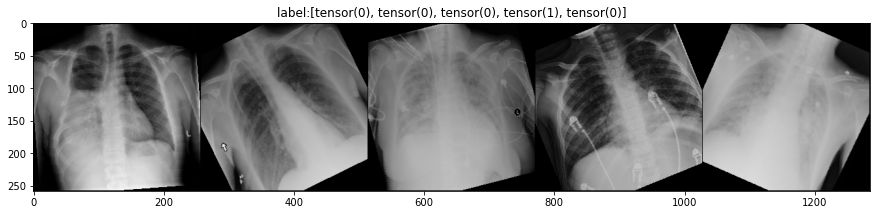

In [20]:
plt.figure(figsize=(15,15))
show(x_grid,y_grid)

In [22]:
len(ds_train)

590

In [23]:
from torchvision import models

In [27]:
models.*?

models.AlexNet
models.DenseNet
models.GoogLeNet
models.GoogLeNetOutputs
models.Inception3
models.InceptionOutputs
models.MNASNet
models.MobileNetV2
models.ResNet
models.ShuffleNetV2
models.SqueezeNet
models.VGG
models.__builtins__
models.__cached__
models.__class__
models.__delattr__
models.__dict__
models.__dir__
models.__doc__
models.__eq__
models.__file__
models.__format__
models.__ge__
models.__getattribute__
models.__gt__
models.__hash__
models.__init__
models.__init_subclass__
models.__le__
models.__loader__
models.__lt__
models.__name__
models.__ne__
models.__new__
models.__package__
models.__path__
models.__reduce__
models.__reduce_ex__
models.__repr__
models.__setattr__
models.__sizeof__
models.__spec__
models.__str__
models.__subclasshook__
models.alexnet
models.densenet
models.densenet121
models.densenet161
models.densenet169
models.densenet201
models.detection
models.googlenet
models.inception
models.inception_v3
models.mnasnet
models.mnasnet0_5
models.mnasnet0_75
models.mn

In [24]:
model_resnet18 = models.resnet18(pretrained=True,num_classes=2)

In [25]:
num_classes = 2
num_ftrs = model_resnet18.fc.in_features
model_resnet18.fc = nn.Linear(num_ftrs, num_classes)

In [31]:
bt = next(iter(train_dl))

/home/bruno/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
#model_resnet18.to('cuda');

In [26]:
#outtt = model_resnet18(bt[0].to('cuda'))
outtt = model_resnet18(bt[0])

NameError: name 'bt' is not defined

In [27]:
from torch import optim

In [28]:
from torch.optim.lr_scheduler import OneCycleLR

In [29]:
opt = optim.Adam(model_resnet18.parameters(), lr=1e-4)

In [30]:
lr_scheduler = OneCycleLR(opt,max_lr=10, pct_start=0.2, steps_per_epoch=1, epochs=11)

In [31]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

In [32]:
def metrics_batch(ouput, target):
    pred = ouput.argmax(dim=1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

In [33]:
los_func = nn.CrossEntropyLoss(reduction='sum')

## We then develop a helper function to compute the loss value per batch of data:

In [34]:
def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metrics_b = metrics_batch(output, target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    return loss.item(), metrics_b

## Next, we develop a helper function to compute the loss value and the performance metric for the entire dataset or an epoch.

## We start the helper function by initializing variables:

In [35]:
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metrics = 0.0
    len_data = len(dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb
        yb = yb
        #xb = xb.to('cuda')
        #yb = yb.to('cuda')
        output = model(xb)
        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)
        running_loss += loss_b
        if metric_b is not None:
            running_metrics += metric_b
        if sanity_check is True:
            break
            
    loss = running_loss/float(len_data)
    metric = running_metrics/float(len_data)
    
    return loss, metric

## Let's develop the train_val function in the following code block.

In [36]:
def train_val(model, params):
    num_epochs = params['num_epochs']
    loss_func = params['loss_func']
    opt = params['optimizer']
    train_dl = params['train_dl']
    val_dl = params['val_dl']
    sanity_check = params['sanity_check']
    lr_scheduler = params['lr_scheduler']
    path2weights = params['path2weights']
    
    loss_history = {
        'train':[],
        'val':[]
    }
    metric_history = {
        'train':[],
        'val':[]
    }
    best_model_weights = copy.deepcopy(model.state_dict())
    best_loss = float('inf')
    
    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print(f'epoch {epoch}/{num_epochs}, current lr:{current_lr}')
        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)
        
        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, val_dl, sanity_check)
            loss_history['val'].append(val_loss)
            metric_history['val'].append(val_metric)
            
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_weights = copy.deepcopy(model.state_dict())
            torch.save(model.state_dict(), path2weights)
            print('best model saved')
        
        lr_scheduler.step()
        print(f'train loss: {train_loss:.6f}, val loss:{val_loss:.6f}, accuracy: {100*val_metric:.2f}')
        print('+-+-'*10)
        
    model.load_state_dict(best_model_weights)
    return model, loss_history, metric_history

In [37]:
import copy


In [38]:
def find_lr(model, loss_fn, optimizer, init_value=1e-8, final_value=10.):
    nunber_in_epoch = len(train_dl) -1
    update_step = (final_value/init_value)**(1/nunber_in_epoch)
    lr = init_value
    optimizer.param_groups[0]["lr"] = lr
    best_loss = 0.0
    batch_num = 0
    losses = []
    log_lrs = []
    for data in train_dl:
        batch_num += 1
        inputs, labels = data
        inputs = inputs
        #inputs = inputs.to('cuda')
        labels = labels
        #labels = labels.to('cuda')
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        
        if batch_num > 1 and loss > 4*best_loss:
            return log_lrs, losses
        
        if loss < best_loss or batch_num == 1:
            best_loss = loss
        
        losses.append(loss)
        log_lrs.append(lr)
        
        loss.backward()
        optimizer.step()
        
        lr *= update_step
        optimizer.param_groups[0]["lr"] = lr
    return log_lrs, losses

In [39]:
def smooth(y, window_size, order, deriv=0, rate=1):
    from math import factorial
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except(ValueError, msg):
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        raise TypeError("window_size size must be a positive odd number")
    if window_size < order + 2:
        raise TypeError("window_size is too small for the polynomials order")
    order_range = range(order+1)
    half_window = (window_size -1) // 2
    # precompute coefficients
    b = np.mat([[k**i for i in order_range] for k in range(-half_window, half_window+1)])
    m = np.linalg.pinv(b).A[deriv] * rate**deriv * factorial(deriv)
    # pad the signal at the extremes with
    # values taken from the signal itself
    firstvals = y[0] - np.abs( y[1:half_window+1][::-1] - y[0] )
    lastvals = y[-1] + np.abs(y[-half_window-1:-1][::-1] - y[-1])
    y = np.concatenate((firstvals, y, lastvals))
    return np.convolve( m[::-1], y, mode='valid')

In [40]:
logs, losses = find_lr(model_resnet18, los_func, opt)

/home/bruno/anaconda3/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370172916/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [41]:
losses_y = np.array([x.detach().cpu().numpy() for x in losses])

In [42]:
losses_y = smooth(losses_y, 21, 1)

In [43]:
min_grad = np.gradient(losses_y).argmin()

In [44]:
logs[min_grad]

3.1622776601683783e-06

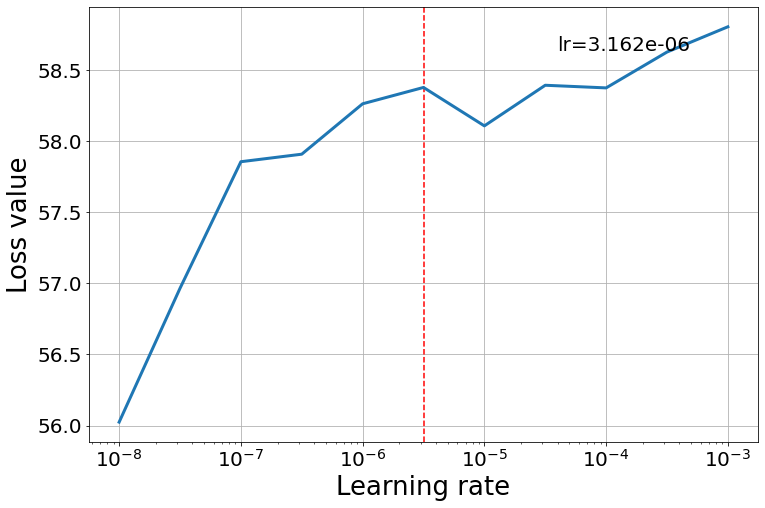

In [52]:
fig, ax = plt.subplots(figsize=(12,8))
ax.axvline(x=logs[min_grad], c='r',ls='--')
ax.annotate(f'lr={logs[min_grad]:.3e}', xy=(logs[min_grad], losses_y[min_grad]),
             xytext=(0.7, 0.9), textcoords='axes fraction', fontsize=20)
ax.plot(logs, losses_y, lw=3.)
plt.ylabel('Loss value', fontsize=26)
plt.xlabel('Learning rate', fontsize=26)
plt.xscale('log')
plt.grid()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)  
    
plt.show()

In [62]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model_resnet18.parameters(), lr=3.16e-6)

In [63]:
loss_func.type

<bound method Module.type of CrossEntropyLoss()>

In [64]:
lr_scheduler = OneCycleLR(opt,max_lr=10,pct_start=0.1, steps_per_epoch=len(train_dl), epochs=11)

In [65]:
import copy

In [66]:
params_train = {
    'num_epochs':11,
    'loss_func':loss_func,
    'optimizer':opt,
    'train_dl':train_dl,
    'val_dl':val_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'models/resnet18.pt'
}

In [67]:
ls

'1_Raio X sem identificação.zip'*   Fibrosis/    single_label_covid.ipynb
 Consolidation/                     Mass/       'teste covid 19.ipynb'*
 DICOM/                             models/      Untitled.ipynb
 DICOMDIR                           Pneumonia/
 Edema/                             PNG/


In [68]:
model_resnet18, loss_history, metrics_history = train_val(model_resnet18, params_train)

epoch 0/11, current lr:0.40000000000000036
best model saved
train loss: 0.524158, val loss:0.537683, accuracy: 81.76
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
epoch 1/11, current lr:0.4596901496054855
train loss: 1.865936, val loss:5915.138144, accuracy: 79.05
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
epoch 2/11, current lr:0.6372760509386417
best model saved
train loss: 37.657428, val loss:0.470907, accuracy: 81.76
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
epoch 3/11, current lr:0.9283409835751346
train loss: 5.498734, val loss:0.590923, accuracy: 81.76
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
epoch 4/11, current lr:1.3256459019424707
train loss: 8.972644, val loss:2152274.905405, accuracy: 81.76
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
epoch 5/11, current lr:1.8193094768671738
train loss: 70.385066, val loss:12367.979730, accuracy: 21.62
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
epoch 6/11, current lr:2.3970538530817294
train loss: 10.301798, val loss:5519.410684, accuracy: 81.76
+-+-+-+

In [69]:
num_epochs = params_train['num_epochs']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


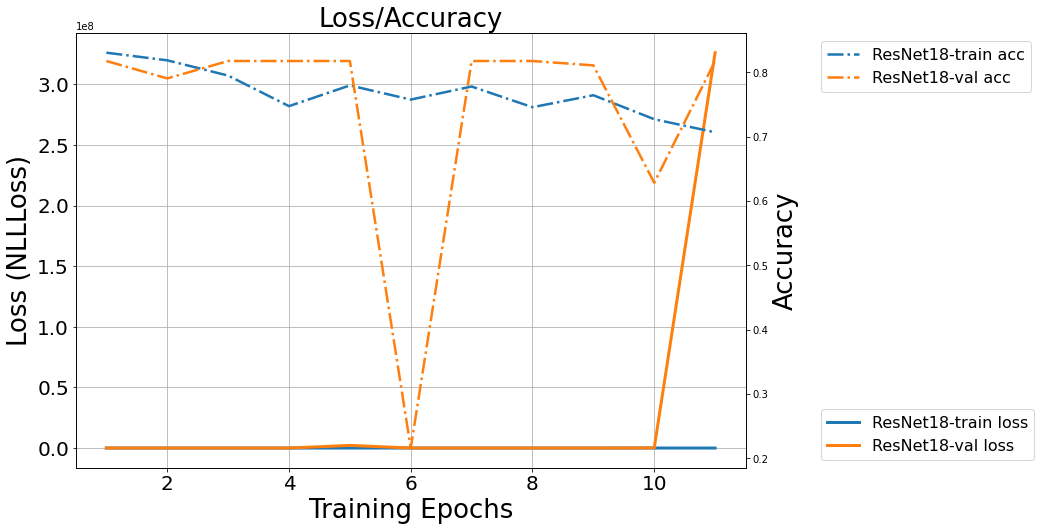

In [91]:
fig, ax = plt.subplots(figsize=(12,8))
twin1 = ax.twinx()
plt.title('Loss/Accuracy', fontsize=26)
ax.plot(range(1,num_epochs+1), loss_history['train'],ls='-', 
        label='ResNet18-train loss', lw=3.)
ax.plot(range(1,num_epochs+1), loss_history['val'],ls='-', 
        label='ResNet18-val loss', lw=3.)
twin1.plot(range(1,num_epochs+1), metrics_history['train'],ls='-.', lw=2.5, 
           label='ResNet18-train acc')
twin1.plot(range(1,num_epochs+1), metrics_history['val'],ls='-.', lw=2.5, 
           label='ResNet18-val acc')
ax.set_ylabel('Loss (NLLLoss)', fontsize=26)
twin1.set_ylabel("Accuracy", fontsize=26)
ax.set_xlabel('Training Epochs', fontsize=26)
ax.legend(bbox_to_anchor=(1.1, 0), loc='lower left',fontsize=16)
twin1.legend(bbox_to_anchor=(1.1, 1), loc='upper left',fontsize=16)
ax.grid()
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tt1 in ax.yaxis.get_major_ticks():
    tt1.label.set_fontsize(20)

plt.savefig('./graph.eps',format='eps')
plt.show()